In [ ]:
pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5886 sha256=0df69f1ab2cb0aa78a0f2f1696ce8c79aef5180a09cc3057c5899f5b9998a4bc
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

librispeech_path = "/content/drive/MyDrive/LibriSpeech"

Mounted at /content/drive


In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'


In [ ]:
#GPU preparation
from keras.backend import set_session
import tensorflow as tf 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10240)])
  except RuntimeError as e:
    print(e)
%load_ext autoreload
%autoreload 2
from sample_models import *
from train_utils import train_model

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_end = final_model(input_dim=161, 
                        units=200,
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='valid',
                        recur_layers=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 the_input (InputLayer)      [(None, None, 161)]       0         
                                                                 
 conv1d (Conv1D)             (None, None, 200)         354400    
                                                                 
 bn_conv_1d (BatchNormalizat  (None, None, 200)        800       
 ion)                                                            
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 200)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, None, 200)         0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 400)        482400

In [ ]:
train_model(input_to_softmax=model_end, 
            pickle_path='model_end.pickle', 
            save_model_path='model_end.h5', 
            spectrogram=True) 

/content/train_utils.py:74: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=audio_gen.next_train(), steps_per_epoch=steps_per_epoch,


Epoch 1/30
106/106 [==============================] - 1049s 10s/step - loss: 224.3341 - val_loss: 206.3278
Epoch 2/30
106/106 [==============================] - 46s 438ms/step - loss: 183.3479 - val_loss: 166.4074
Epoch 3/30
106/106 [==============================] - 42s 396ms/step - loss: 168.7624 - val_loss: 155.6109
Epoch 4/30
106/106 [==============================] - 42s 399ms/step - loss: 159.2754 - val_loss: 148.2179
Epoch 5/30
106/106 [==============================] - 41s 390ms/step - loss: 150.9232 - val_loss: 141.9203
Epoch 6/30
106/106 [==============================] - 43s 409ms/step - loss: 144.6928 - val_loss: 139.2970
Epoch 7/30
106/106 [==============================] - 43s 406ms/step - loss: 139.0657 - val_loss: 136.6859
Epoch 8/30
106/106 [==============================] - 43s 409ms/step - loss: 134.5832 - val_loss: 133.7779
Epoch 9/30
106/106 [==============================] - 43s 409ms/step - loss: 130.0963 - val_loss: 131.6570
Epoch 10/30
106/106 [================

In [ ]:
from data_generator import vis_train_features
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

There are 2136 total training examples.


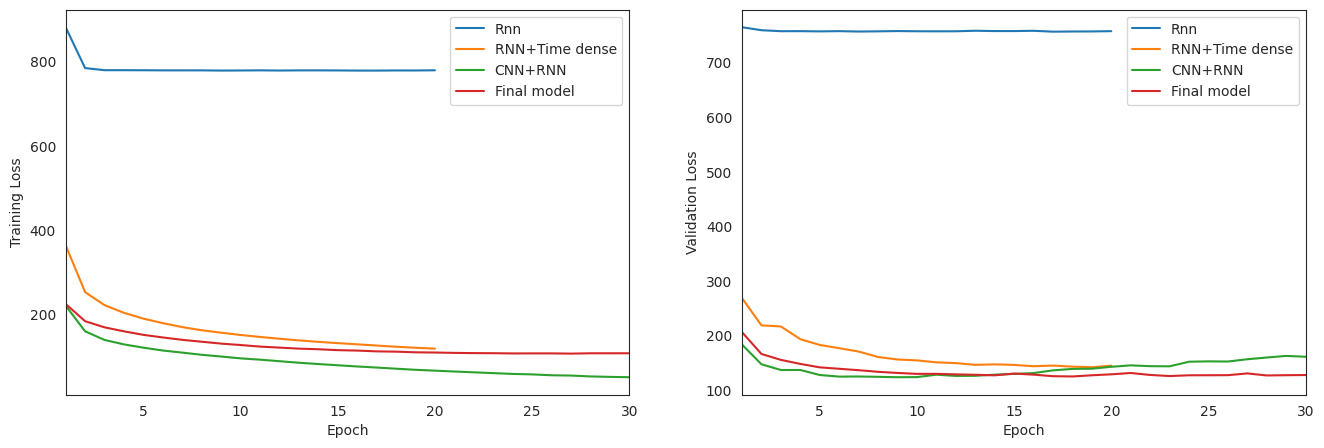

In [ ]:
from glob import glob
import numpy as np
import _pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style='white')

all_pickles = sorted(glob("results/*.pickle"))
model_names = ["Rnn","RNN+Time dense","CNN+RNN","Final model"]
valid_loss = [pickle.load( open( i, "rb" ) )['val_loss'] for i in all_pickles]
train_loss = [pickle.load( open( i, "rb" ) )['loss'] for i in all_pickles]
num_epochs = [len(valid_loss[i]) for i in range(len(valid_loss))]

fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(121)
for i in range(len(all_pickles)):
    ax1.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            train_loss[i], label=model_names[i])
# clean up the plot
ax1.legend()  
ax1.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# plot the validation loss vs. epoch for each model
ax2 = fig.add_subplot(122)
for i in range(len(all_pickles)):
    ax2.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            valid_loss[i], label=model_names[i])
# clean up the plot
ax2.legend()  
ax2.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()